# Problem Set 1
### Jonas Katona
#### Math 228B
#### Professor Per-Olof Persson
**Note:** I used Julia 0.7.0 for this problem set, because this is what we used for Math 228A, so I am used to it. I will try to use one of the newer versions for later problem sets.

## Problem 1
**Part (a)**

The 9-point Laplacian is given by the following, which is equation (3.17) in *Finite Difference Methods for Ordinary and Partial Differential Equations* by Randall J. LeVeque:

$$\nabla^{2}_{9}u_{ij}=\frac{1}{6h^{2}}\left(4u_{i-1,j}+4u_{i+1,j}++4u_{i,j-1}++4u_{i,j+1}+u_{i-1,j-1}+u_{i-1,j+1}+u_{i+1,j-1}+u_{i+1,j+1}-20u_{i,j}\right) \quad (1)$$

Now, let's assume that we have the exact value of the Laplacian at $(x_{i},y_{j})$, which we will denote $\nabla^{2}u\vert_{(x_{i},y_{j})}:=\nabla^{2}u$. Then, we first take the hint given, which is that "the 9-point Laplacian can be written as the 5-point Laplacian (with known truncation error) plus a finite difference approximation that models $\frac{1}{6}h^{2}u_{xxyy}+O\left(h^{4}\right)$. The five-point Laplacian is the following, also given in LeVeque as equation (3.10):

$$\nabla^{2}_{5}u_{ij}=\frac{1}{h^{2}}\left(u_{i-1,j}+u_{i+1,j}+u_{i,j-1}+u_{i,j+1}-4u_{i,j}\right)\quad(2)$$

Thus, we should write $(1)$ in terms of $(2)$ and an extra term, which we will do error analysis on later. Note that $(1)$ can be written in the form $\nabla^{2}_{9}u_{ij}=\frac{2}{3h^{2}}\left(u_{i-1,j}+u_{i+1,j}+u_{i,j-1}+u_{i,j+1}-4u_{i,j}\right)+\frac{1}{6h^{2}}\left(u_{i-1,j-1}+u_{i-1,j+1}+u_{i+1,j-1}+u_{i+1,j+1}-4u_{i,j}\right)$, and substituting $(2)$, this becomes 

$$\nabla^{2}_{9}u_{ij}=\frac{2}{3}\nabla^{2}_{5}u_{ij}+\frac{1}{6h^{2}}\left(u_{i-1,j-1}+u_{i-1,j+1}+u_{i+1,j-1}+u_{i+1,j+1}-4u_{i,j}\right)\quad(3)$$

We know the local truncation error for the five-point Laplacian, given as $\nabla^{2}_{5}u_{ij}=\nabla^{2}u+\frac{h^{2}}{12}\left(u_{xxxx}+u_{yyyy}\right)+O\left(h^{4}\right)$. Therefore, $(3)$ can be rewritten as:

$$\nabla^{2}_{9}u_{ij}=\frac{2}{3}\left(\nabla^{2}u+\frac{h^{2}}{12}\left(u_{xxxx}+u_{yyyy}\right)+O\left(h^{4}\right)\right)+\frac{1}{6h^{2}}\left(u_{i-1,j-1}+u_{i-1,j+1}+u_{i+1,j-1}+u_{i+1,j+1}-4u_{i,j}\right) \\ \nabla^{2}_{9}u_{ij}=\frac{2}{3}\nabla^{2}u+\frac{h^{2}}{18}\left(u_{xxxx}+u_{yyyy}\right)+\frac{1}{6h^{2}}\left(u_{i-1,j-1}+u_{i-1,j+1}+u_{i+1,j-1}+u_{i+1,j+1}-4u_{i,j}\right)+O\left(h^{4}\right)\quad(4)$$

Now we take multivariable Taylor expansions of $u$ at points $u(x_{k},y_{l})=u_{k,l}$, for $k=i-1,i+1$ and $l=j-1,j+1$. These expansions will all be taken about $u(x_{i},y_{j})=u_{i,j}$, so we only need $4$ series expansions, but these will all have to be to fifth-order (because they will be multiplied by a constant $O\left(\frac{1}{h^{2}}\right)$). (We technically only need to go to *fourth*-order, but we want to explicitly show that, after the LTE, the nine-point Laplacian has further terms which are only $O\left(h^{4}\right)$, and all $O\left(h^{3}\right)$ terms vanish.)

We define $h:=u_{i,j}-u_{i-1,j}=u_{i,j}-u_{i,j-1}\hspace{0.1cm}\forall i,j$ (i.e. assume uniform stepsize, uniform in both directions).

$$
u_{i-1,j-1}=u_{i,j}-h\left(u_{x}+u_{y}\right)+\frac{h^{2}}{2}\left(u_{xx}+2u_{xy}+u_{yy}\right)-\frac{h^{3}}{6}\left(u_{xxx}+3u_{xxy}+3u_{xyy}+u_{yyy}\right)+\frac{h^{4}}{24}\left(u_{xxxx}+4u_{xxxy}+6u_{xxyy}+4u_{xyyy}+u_{yyyy}\right)-\frac{h^{5}}{120}\left(u_{xxxxx}+5u_{xxxxy}+10u_{xxxyy}+10u_{xxyyy}+5u_{xyyyy}+u_{yyyyy}\right)+O\left(h^{6}\right) \\
u_{i+1,j-1}=u_{i,j}+h\left(u_{x}-u_{y}\right)+\frac{h^{2}}{2}\left(u_{xx}-2u_{xy}+u_{yy}\right)+\frac{h^{3}}{6}\left(u_{xxx}-3u_{xxy}+3u_{xyy}-u_{yyy}\right)+\frac{h^{4}}{24}\left(u_{xxxx}-4u_{xxxy}+6u_{xxyy}-4u_{xyyy}+u_{yyyy}\right)-\frac{h^{5}}{120}\left(u_{xxxxx}-5u_{xxxxy}+10u_{xxxyy}-10u_{xxyyy}+5u_{xyyyy}-u_{yyyyy}\right)+O\left(h^{6}\right) \\
u_{i-1,j+1}=u_{i,j}-h\left(u_{x}-u_{y}\right)+\frac{h^{2}}{2}\left(u_{xx}-2u_{xy}+u_{yy}\right)-\frac{h^{3}}{6}\left(u_{xxx}-3u_{xxy}+3u_{xyy}-u_{yyy}\right)+\frac{h^{4}}{24}\left(u_{xxxx}-4u_{xxxy}+6u_{xxyy}-4u_{xyyy}+u_{yyyy}\right)+\frac{h^{5}}{120}\left(u_{xxxxx}-5u_{xxxxy}+10u_{xxxyy}-10u_{xxyyy}+5u_{xyyyy}-u_{yyyyy}\right)+O\left(h^{6}\right) \\
u_{i+1,j+1}=u_{i,j}+h\left(u_{x}+u_{y}\right)+\frac{h^{2}}{2}\left(u_{xx}+2u_{xy}+u_{yy}\right)+\frac{h^{3}}{6}\left(u_{xxx}+3u_{xxy}+3u_{xyy}+u_{yyy}\right)+\frac{h^{4}}{24}\left(u_{xxxx}+4u_{xxxy}+6u_{xxyy}+4u_{xyyy}+u_{yyyy}\right)+\frac{h^{5}}{120}\left(u_{xxxxx}+5u_{xxxxy}+10u_{xxxyy}+10u_{xxyyy}+5u_{xyyyy}+u_{yyyyy}\right)+O\left(h^{6}\right) \quad(5)
$$

(Assume that all actual partial derivatives are evaluated at $(x_{i},y_{j})$.) Summing these series expansions altogether (which is pretty easy; just visually go down each line), we get the following: 
$$u_{i-1,j-1}+u_{i-1,j+1}+u_{i+1,j-1}+u_{i+1,j+1}=4u_{i,j}+2h^{2}u_{xx}+2h^{2}u_{yy}+\frac{h^{4}}{6}u_{xxxx}+h^{4}u_{xxyy}+\frac{h^{4}}{6}u_{yyyy}+O\left(h^{6}\right)\quad(6)$$

Finally, we plug $(6)$ into $(4)$, which gives us

$$
\nabla^{2}_{9}u_{ij}=\frac{2}{3}\nabla^{2}u+\frac{h^{2}}{18}\left(u_{xxxx}+u_{yyyy}\right)+\frac{1}{6h^{2}}\left(4u_{i,j}+2h^{2}u_{xx}+2h^{2}u_{yy}+\frac{h^{4}}{6}u_{xxxx}+h^{4}u_{xxyy}+\frac{h^{4}}{6}u_{yyyy}-4u_{i,j}\right)+O\left(h^{4}\right) \\ \nabla^{2}_{9}u_{ij}=\frac{2}{3}\nabla^{2}u+\frac{h^{2}}{18}\left(u_{xxxx}+u_{yyyy}\right)+\frac{h^{2}}{36}\left(u_{xxxx}+u_{yyyy}\right)+\frac{h^{2}}{6}u_{xxyy}+\frac{1}{3}\left(u_{xx}+u_{yy}\right)+O\left(h^{4}\right)\quad(7)
$$

Of course, $\frac{1}{18}+\frac{1}{36}=\frac{1}{12}$ and $u_{xx}+u_{yy}=\nabla^{2}u$, so then $(7)$ just becomes

$$
\nabla^{2}_{9}u_{ij}=\nabla^{2}u+\frac{h^{2}}{12}\left(u_{xxxx}+2u_{xxyy}+u_{yyyy}\right)+O\left(h^{4}\right)
$$

Therefore, as shown in the textbook, the LTE for the nine-point Laplacian is just $\boxed{\tau_{i,j}:=\nabla^{2}_{9}u_{ij}-\nabla^{2}u=\frac{h^{2}}{12}\left(u_{xxxx}+2u_{xxyy}+u_{yyyy}\right)+O\left(h^{4}\right)\equiv\frac{h^{2}}{12}\nabla^{4}u+O\left(h^{4}\right)}$.

**Part (b)**

The nine-point Laplacian is defined in part (a) as $(1)$. To modify the code, we will at first insert the *nine-point* stencil into the matrix for each node point vs. the *five-point* stencil in the original code. This will give us a block *pentadiagonal* matrix vs. a block tridiagonal matrix, which is fortunately still sparse, so we can continue using Julia's SparseArrays package. Julia can invert this just fine.

However, looking at the LTE derived in the last section, we see that, for the Poisson problem, $\nabla^{4}u=\nabla^{2}\left(\nabla^{2}u\right)=-\nabla^{2}f$. Therefore, $\nabla^{2}_{9}u_{ij}-\nabla^{2}u=-\frac{h^{2}}{12}\nabla^{2}f+O\left(h^{4}\right)$, so in place of solving $\nabla^{2}_{9}u_{ij}=-f\left(x_{i},y_{j}\right)$, we could instead solve $\nabla^{2}_{9}u_{ij}=-F\left(x_{i},y_{j}\right):=-\left(f\left(x_{i},y_{j}\right)+\frac{h^{2}}{12}\nabla^{2}f\right)$ for $O\left(h^{4}\right)$ accuracy. Furthermore, since we might only know $f$ at discrete points (or just not be able to symbolically differentiate it), we can still use the five-point stencil to approximate $\nabla^{2}f$ and retain $O\left(h^{4}\right)$ accuracy. This is because $\nabla^{2}_{5}f_{ij}=\nabla^{2}f+O\left(h^{2}\right)$, so $\nabla^{2}_{9}u_{ij}-\nabla^{2}u=-\frac{h^{2}}{12}\nabla^{2}f+O\left(h^{4}\right)=-\frac{h^{2}}{12}\left(\nabla^{2}_{5}f_{ij}+O\left(h^{2}\right)\right)+O\left(h^{4}\right)=-\frac{h^{2}}{12}\nabla^{2}_{5}f_{ij}+O\left(h^{4}\right)$. (Of course, all of these suggestions can be found in Section 3.5 of LeVeque.) 

The modified code is below.

In [1]:
using SparseArrays
using PyPlot

function fdpoisson9(n, f, g)
    h = 1.0 / n
    N = (n + 1) ^ 2
    x = h * (0 : n)
    y = x

    umap = reshape(1 : N, n + 1, n + 1) # Index mapping from 2D grid to vector
    A = Tuple{Int64, Int64, Float64}[] # Array of matrix elements (row,col,value)
    b = zeros(N)

    # Main loop, insert stencil in matrix for each node point
    #This is the main part of the code that we modify from a 5-point to 9-point stencil
    for j = 1 : n + 1
        for i = 1 : n + 1
            row = umap[i, j]
            if i == 1 || i == n + 1 || j == 1 || j == n + 1
                # Dirichlet boundary condition, u = g
                push!(A, (row, row, 1.0))
                b[row] = g(x[i], y[j])
            else
                # Interior nodes, 9-point stencil
                push!(A, (row, row, 20.0))
                push!(A, (row, umap[i - 1, j - 1], -1.0))
                push!(A, (row, umap[i - 1, j], -4.0))
                push!(A, (row, umap[i - 1, j + 1], -1.0))
                push!(A, (row, umap[i, j - 1], -4.0))
                push!(A, (row, umap[i, j + 1], -4.0))
                push!(A, (row, umap[i + 1, j - 1], -1.0))
                push!(A, (row, umap[i + 1, j], -4.0))
                push!(A, (row, umap[i + 1, j + 1], -1.0))
                b[row] = (f(x[i], y[j]) + (f(x[i - 1], y[j]) + f(x[i + 1], y[j]) + f(x[i], y[j - 1]) + f(x[i], y[j + 1]) - 4 * f(x[i], y[j]))  / 12) * 6 * h ^ 2
                #including correction term to make this method fourth-order
            end
        end
    end

    # Create CSC sparse matrix from matrix elements
    A = sparse((x->x[1]).(A), (x->x[2]).(A), (x->x[3]).(A), N, N)

    return A, b, x, y
end

fdpoisson9 (generic function with 1 method)

We test this code against the sample problem given in the original Julia notebook for the five-point stencil.

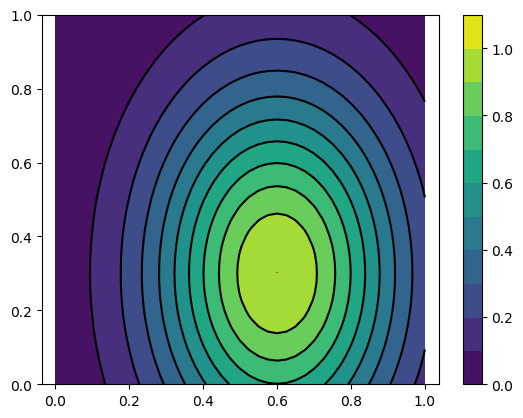

1.3028384144853078e-6

In [2]:
function testpoisson(n)
    uexact(x, y) = exp(-(4(x - 0.3) ^ 2 + 9(y - 0.6) ^ 2))
    f(x, y) = uexact(x, y) * (26 - (18y - 10.8) ^ 2 - (8x - 2.4) ^ 2)
    A, b, x, y = fdpoisson9(n, f, uexact)

    # Solve + reshape for plotting
    u = reshape(A \ b, n + 1, n + 1)

    # Plotting
    clf()
    contour(x, y, u, 10, colors = "k")
    contourf(x, y, u, 10)
    axis("equal")
    colorbar()
    
    # Compute error in max-norm
    u0 = uexact.(x, y')
    error = maximum(abs.(u - u0))
end

error = testpoisson(40)

The error is noticeably smaller, being something order $10^{-6}$ vs. $10^{-3}$ as in the original. This naturally alludes to some higher-order accuracy, but to further check the exact accuracy of our new scheme, we apply a grid refinement test.

The motivation behind the test goes a little bit like this. Suppose that the absolute error between our numerical solution, $u^{*}$, and the exact solution, $u$, is equal to $\vert\vert u-u^{*}\vert\vert=Ch^{p}$, where $C$ is some arbitrary constant dependent (at least in theory) on some higher-order partial derivatives of $u$, $h$ is the grid stepsize (which we take to be uniform), and $p$ we call the *order of convergence* (or alternatively, the *order of accuracy*). Then, naturally, by the properties of the logarithm, $\log\vert\vert u-u^{*}\vert\vert=\log C + p\log h$, so by graphing a log-log plot of the absolute error vs. the stepsize, the slope of the resulting line will give us $p$, as desired.

For this problem, we want to show that $p=4$ (i.e. the accuracy is fourth-order). To test this out, we calculate the absolute error for $h=2^{-i}$, where $i=4,\dots,8$, then find a best-fit slope of the log-log graph using the slope formula from linear least-squares.

Slope for 9-point Poisson = 

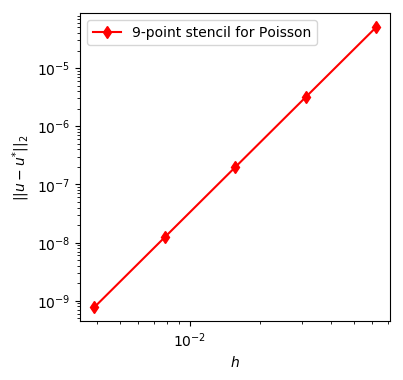

3.998599434363142


In [3]:
using PyPlot

Nq = 2 .^ (4 : 8)
errors = zeros(size(Nq))
uexact(x, y) = exp(-(4(x - 0.3) ^ 2 + 9(y - 0.6) ^ 2))
f(x, y) = uexact(x, y) * (26 - (18y - 10.8) ^ 2 - (8x - 2.4) ^ 2)
n = length(Nq)
for i = 1 : n
    N = Nq[i]
    A, b, x, y = fdpoisson9(N, f, uexact)
    u = reshape(A \ b, N + 1, N + 1)
    u0 = uexact.(x, y')
    errors[i] = maximum(abs.(u - u0))
end

hq = 1.0 ./ Nq
figure(1, figsize = (4, 4))
loglog(hq, errors, "r-d", label = "9-point stencil for Poisson")
xlabel(L"h")
ylabel(L"\vert\vert u-u^{*}\vert\vert_{2}")
legend()

logerrors = log.(errors)
logh = log.(hq)
slope = (n * sum(logerrors .* logh) - sum(logerrors) * sum(logh)) / (n * sum(logh .^ 2) - sum(logh) ^ 2)

println("Slope for 9-point Poisson = ", slope)

Therefore, since $p=3.998599434363142\approx 4$, we have shown that the convergence rate (i.e. accuracy) for the corrected nine-point Poisson problem is roughly quartic, or fourth-order, as desired. $\boxed{}$

## Problem 2
**Part (a)**

To transform the unit square, computational domain $\hat{\Omega}$ (w/ transformed coordinates $\xi,\eta$) to the original domain $\Omega$ (w/ physical coordinates $x,y$), we suppose that our mapping $T=T(\xi,\eta)$ is bilinear in $\xi$ and $\eta$. Therefore, in the most general case, it can be written as:

$$
T(\xi,\eta)=\begin{bmatrix} x(\xi,\eta) \\ y(\xi,\eta) \end{bmatrix}=\begin{bmatrix} a_{0}+a_{1}\xi+a_{2}\eta+a_{3}\xi\eta \\ b_{0}+b_{1}\xi+b_{2}\eta+b_{3}\xi\eta \end{bmatrix}\quad(1)
$$

Given that $(1)$ has eight unknowns, we require eight equations to solve for them. A simple choice of eight equations would be those relating the corners of the original domain $\Omega$ to those in the computational domain $\hat{\Omega}$. In other words, we should look at how $P^{'}_{1}$, $P^{'}_{2}$, $P^{'}_{3}$, and $P^{'}_{4}$ change for each coordinate under $T(\xi,\eta)$ into $P_{1}$, $P_{2}$, $P_{3}$, and $P_{4}$, respectively. Also, for simplicity's sake, we should keep $P_{1}$ and $P^{'}_{1}$ to be the origins at $(0,0)$ in both $\Omega$ and $\hat{\Omega}$, respectively. 

These boundary conditions give us the following eight equations:

$$
x\left(1,0\right)=\frac{B}{2},\hspace{0.1cm}x\left(1,1\right)=\frac{B}{2}+A,\hspace{0.1cm}y\left(0,1\right)=y\left(1,1\right)=H,\hspace{0.1cm}x\left(0,0\right)=y\left(0,0\right)=x\left(0,1\right)=y\left(1,0\right)=0\quad(2)
$$

Now, we combine $(1)$ and $(2)$ to solve for the constants in $(1)$. From first glance, we immediately see from the fifth and sixth equations that $a_{0}=b_{0}=0$ (and that is exactly why it was convenient to keep $P_{1}$ as the origin for both domains). Next, the seventh and eighth equations imply that $a_{2}=b_{1}=0$. Using the third equation, we get that $b_{2}=H$, which when combined with the fourth equations implies that $b_{3}=0$. Finally, from the first equation, we note that $a_{1}=\frac{B}{2}$, which implies when combined with the second equation that $a_{3}=A$.

Therefore, the mapping which we will use to map $\hat{\Omega}$ to $\Omega$ is given as

$$
\boxed{T\left(\xi,\eta\right)=\begin{bmatrix} x\left(\xi,\eta\right) \\ y\left(\xi,\eta\right) \end{bmatrix}=\begin{bmatrix} \xi\left(\frac{B}{2}+A\eta\right) \\ H\eta \end{bmatrix}}
$$

Also, for posterity's sake, we write down the inverse mapping $T^{-1}(x,y)$ from $\Omega$ to $\hat{\Omega}$ by solving the two bilinear equations above for $\xi=\xi\left(x,y\right)$ and $\eta=\eta\left(x,y\right)$.

$$
\boxed{T^{-1}(x,y)=\begin{bmatrix} \xi\left(x,y\right) \\ \eta\left(x,y\right) \end{bmatrix}=\begin{bmatrix} \frac{2Hx}{2Ay+BH} \\ \frac{y}{H} \end{bmatrix}}
$$

Next, we derive the Laplacian finite difference operator in the computational domain $\hat{\Omega}$. The general result for any arbitrary mapping is given here, taken from Professor Per-Olof Persson's slides entitled "Finite Difference Methods for PDEs":

$$
-\frac{1}{J^{2}}\left(au_{\xi\xi}-2bu_{\xi\eta}+cu_{\eta\eta}+du_{\eta}+eu_{\xi}\right)=f\quad(3)
$$

We will discretize $(3)$ in part (b) and put it into a system of linear equations which can be solved for $u$. The parameters found above are defined as follows:

$$a=x^{2}_{\eta}+y^{2}_{\eta},\hspace{0.1cm}b=x_{\xi}x_{\eta}+y_{\xi}y_{\eta},\hspace{0.1cm}c=x^{2}_{\xi}+y^{2}_{\xi},\hspace{0.1cm}d=\frac{y_{\xi}\alpha-x_{\xi}\beta}{J},\hspace{0.1cm}e=\frac{x_{\eta}\beta-y_{\eta}\alpha}{J},\hspace{0.1cm}J=x_{\xi}y_{\eta}-x_{\eta}y_{\xi},\hspace{0.1cm}\alpha=ax_{\xi\xi}-2bx_{\xi\eta}+cx_{\eta\eta},\hspace{0.1cm}\beta=ay_{\xi\xi}-2by_{\xi\eta}+cy_{\eta\eta}\quad(4)
$$

Since we have $T\left(\xi,\eta\right)$ (and thereby also $x\left(\xi,\eta\right)$ and $y\left(\xi,\eta\right)$), we can write out the partial derivatives of $x$ and $y$ with respect to the transformed coordinates $\xi$ and $\eta$.

$$
x_{\xi}=\frac{B}{2}+A\eta,\hspace{0.1cm}x_{\eta}=A\xi,\hspace{0.1cm}x_{\xi\xi}=x_{\eta\eta}=0,\hspace{0.1cm}x_{\xi\eta}=A,y_{\eta}=H,\hspace{0.1cm}y_{\xi}=y_{\xi\xi}=y_{\xi\eta}=y_{\eta\eta}=0
$$

Plugging these directly into $(4)$, we get that our parameters are:

$$
a=A^{2}\xi^{2}+H^{2},\hspace{0.1cm}b=A\xi\left(\frac{B}{2}+A\eta\right),\hspace{0.1cm}c=\left(\frac{B}{2}+A\eta\right)^{2},\hspace{0.1cm}d=0,\hspace{0.1cm}e=-\frac{H\alpha}{J},\\ J=H\left(\frac{B}{2}+A\eta\right),\hspace{0.1cm}\alpha=-2bx_{\xi\eta}=-2A^{2}\xi\left(\frac{B}{2}+A\eta\right),\hspace{0.1cm}\beta=0
$$

Therefore, simplifying slightly further, our final set of parameters is:

$$
\boxed{a=A^{2}\xi^{2}+H^{2},\hspace{0.1cm}b=A\xi\left(\frac{B}{2}+A\eta\right),\hspace{0.1cm}c=\left(\frac{B}{2}+A\eta\right)^{2},\hspace{0.1cm}d=0,\hspace{0.1cm}e=2A^{2}\xi,\hspace{0.1cm}J=H\left(\frac{B}{2}+A\eta\right)}
$$

These can be used to calculate the Laplacian correctly in the computational domain $\hat{\Omega}$, as given in $(3)$. 

Last but definitely not least, we need to transform the boundary conditions as defined on $\Omega$ and derive how they might look on $\hat{\Omega}$. The boundary conditions on $P^{'}_{1}P^{'}_{2}$ and $P^{'}_{2}P^{'}_{3}$ are still trivially $u=0$. However, the boundary conditions to transform nontrivially are the Neumann boundary conditions along $P_{1}P_{4}$ and $P_{4}P_{3}$. The formula for the normal derivative is given in "Finite Difference Methods for PDEs," but easily derivable using the chain rule with partial derivatives in the transformed coordinates:

$$
\frac{\partial u}{\partial n}=\frac{1}{J}\left[\left(y_{\eta}n^{x}-x_{\eta}n^{y}\right)u_{\xi}+\left(-y_{\xi}n^{x}+x_{\xi}n^{y}\right)u_{\eta}\right]\quad(5)
$$

$n^{x}$ and $n^{y}$ vary depending on along which portion of $\partial\hat{\Omega}$ we are calculating the normal derivative. Along the top boundary ($P^{'}_{4}P^{'}_{3}$, where $\eta=1$), $n^{x}=-\frac{y_{\xi}}{\sqrt{x^{2}_{\xi}+y^{2}_{\xi}}}=0$ and $n^{y}=\frac{x_{\xi}}{\sqrt{x^{2}_{\xi}+y^{2}_{\xi}}}=1$ , and along the left boundary ($P^{'}_{1}P^{'}_{4}$, where we have $\xi=0$), we have 
$$
n^{x}=-\frac{y_{\eta}}{\sqrt{x^{2}_{\eta}+y^{2}_{\eta}}}=-\frac{H}{\sqrt{A^{2}\xi^{2}+H^{2}}}=-1 \\
n^{y}=\frac{x_{\eta}}{\sqrt{x^{2}_{\eta}+y^{2}_{\eta}}}=\frac{A\xi}{\sqrt{A^{2}\xi^{2}+H^{2}}}=0
$$

Substituting these into $(5)$, we get that

$$
\frac{\partial u}{\partial n}\vert_{P_{4}P_{3}}=\frac{1}{J}\left(x_{\xi}u_{\eta}-x_{\eta}u_{\xi}\right)\vert_{P^{'}_{4}P^{'}_{3}} \Rightarrow \boxed{\frac{\partial u}{\partial n}\vert_{P_{4}P_{3}}=\frac{2}{H\left(B+2A\right)}\left(\left(\frac{B}{2}+A\right)u_{\eta}\vert_{P^{'}_{4}P^{'}_{3}}-A\xi u_{\xi}\vert_{P^{'}_{4}P^{'}_{3}}\right)} \\
\frac{\partial u}{\partial n}\vert_{P_{1}P_{4}}=\frac{1}{J}\left(y_{\xi}u_{\eta}-y_{\eta}u_{\xi}\right)\vert_{P^{'}_{1}P^{'}_{4}} \Rightarrow \boxed{\frac{\partial u}{\partial n}\vert_{P_{1}P_{4}}=-\frac{2u_{\xi}\vert_{P^{'}_{1}P^{'}_{4}}}{B+2A\eta}}
$$

Of course, the Neumann boundary conditions which we want to enforce along the top and left sides of the region are that $\frac{\partial u}{\partial n}\vert_{P_{4}P_{3}}=\frac{\partial u}{\partial n}\vert_{P_{1}P_{4}}=0$. We will see what this means in terms of the discretization of these boundary conditions very soon, in part (b).

**Part (b)**

When we write $u_{i,j}$, we are merely referring to $u_{i,j}=u\left(\xi_{i},\eta_{j}\right)$. Also, as we see in our analysis from part (a), $a$, $b$, $c$, $e$, and $J$ are explicit functions of $\xi$, $\eta$, or both. Therefore, the same notation applies for all of these parameters (e.g. $a_{i,j}=a\left(\xi_{i},\eta_{j}\right)$). 

To derive second-order accurate finite-difference schemes, we simply use the standard central difference scheme for both the first and second derivatives in either direction (besides for $u_{\xi\eta}$, which we will deal with after this). (These all come from LeVeque, and are all derivable from multivariable Taylor series expansions.) Thus, assuming a uniform stepsize in both directions of $h=u_{i,j}-u_{i-1,j}=u_{i,j}-u_{i,j-1}\hspace{0.1cm}\forall i,j$,

$$
u_{\xi}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{u_{i+1,j}-u_{i-1,j}}{2h}+O\left(h^{2}\right),\hspace{0.1cm}
u_{\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{u_{i,j+1}-u_{i,j-1}}{2h}+O\left(h^{2}\right) \\
u_{\xi\xi}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^{2}}+O\left(h^{2}\right),\hspace{0.1cm}
u_{\eta\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h^{2}}+O\left(h^{2}\right)\quad(6)
$$

Finally, to derive a second-order finite-difference approximation for $u_{\xi\eta}$, we look back to $(5)$ from problem 1. We want to isolate that term somehow, so we start off by calculating $u_{i-1,j-1}+u_{i+1,j+1}-u_{i+1,j-1}-u_{i-1,j+1}$. We get that

$$
u_{i-1,j-1}+u_{i+1,j+1}-u_{i+1,j-1}-u_{i-1,j+1}=4h^{2}u_{\xi\eta}+\frac{2h^{4}}{3}\left(u_{\xi\xi\xi\eta}+u_{\eta\eta\eta\xi}\right)+O\left(h^{6}\right)
$$

Therefore, solving for $u_{\xi\eta}$, we get that our finite-difference approximation should be

$$
u_{\xi\eta}=\frac{u_{i-1,j-1}+u_{i+1,j+1}-u_{i+1,j-1}-u_{i-1,j+1}}{4h^{2}}-\frac{h^{2}}{6}\left(u_{\xi\xi\xi\eta}+u_{\eta\eta\eta\xi}\right)+O\left(h^{4}\right) \quad(7)
$$

which confirms that this scheme is also second-order accurate.

From here, we can discretize $(3)$ with the intention of writing it as a matrix equation which can be solved for $u=u_{i,j}$.

$$
\Rightarrow -\frac{1}{J^{2}_{i,j}}\left(a_{i,j}u_{\xi\xi}\vert_{\left(\xi_{i},\eta_{j}\right)}-2b_{i,j}u_{\xi\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}+c_{i,j}u_{\eta\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}+d_{i,j}u_{\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}+e_{i,j}u_{\xi}\vert_{\left(\xi_{i},\eta_{j}\right)}\right)=f_{i,j} \\ \Rightarrow -\frac{1}{J^{2}_{i,j}}\left(\frac{a_{i,j}}{h^{2}}\left(u_{i+1,j}-2u_{i,j}+u_{i-1,j}\right)-\frac{2b_{i,j}}{4h^{2}}\left(u_{i-1,j-1}+u_{i+1,j+1}-u_{i+1,j-1}-u_{i-1,j+1}\right)+\frac{c_{i,j}}{h^{2}}\left(u_{i,j+1}-2u_{i,j}+u_{i,j-1}\right)+\frac{e_{i,j}}{2h}\left(u_{i+1,j}-u_{i-1,j}\right)\right)=f_{i,j} \\ \Rightarrow -\frac{1}{h^{2}J^{2}_{i,j}}\left(a_{i,j}\left(u_{i+1,j}-2u_{i,j}+u_{i-1,j}\right)-\frac{b_{i,j}}{2}\left(u_{i-1,j-1}+u_{i+1,j+1}-u_{i+1,j-1}-u_{i-1,j+1}\right)+c_{i,j}\left(u_{i,j+1}-2u_{i,j}+u_{i,j-1}\right)+\frac{he_{i,j}}{2}\left(u_{i+1,j}-u_{i-1,j}\right)\right)=f_{i,j} \\ \Rightarrow \boxed{-\frac{1}{h^{2}J^{2}_{i,j}}\left[\left(a_{i,j}+\frac{he_{i,j}}{2}\right)u_{i+1,j}+\left(a_{i,j}-\frac{he_{i,j}}{2}\right)u_{i-1,j}\\-\frac{b_{i,j}}{2}\left(u_{i-1,j-1}+u_{i+1,j+1}-u_{i+1,j-1}-u_{i-1,j+1}\right)+c_{i,j}\left(u_{i,j+1}+u_{i,j-1}\right)-2\left(a_{i,j}+c_{i,j}\right)u_{i,j}\right]=f_{i,j}}
$$

Since this is a nine-point stencil, it will give us a pentadiagonal matrix, so we should still implement SparseArrays in part (c) when solving the equation. Also note that, for our problem, $f_{i,j}=1$.

Now, we discretize the boundary conditions. (As a reminder, we are using a regular grid with $\left(n+1\right)\times\left(n+1\right)$ points for our computation.) The $P^{'}_{1}P^{'}_{2}$ and $P^{'}_{2}P^{'}_{3}$ boundary conditions give us that $u_{i,1}=0\hspace{0.1cm}\forall i=1,\dots,n+1$ and $u_{n+1,j}=0\hspace{0.1cm}\forall j=1,\dots,n+1$, respectively. For the Neumann boundary conditions, we first impose them on the last two boxed equations from part (a).

$$
\frac{\partial u}{\partial n}\vert_{P_{4}P_{3}}=\frac{2}{H\left(B+2A\right)}\left(\left(\frac{B}{2}+A\right)u_{\eta}\vert_{P^{'}_{4}P^{'}_{3}}-A\xi u_{\xi}\vert_{P^{'}_{4}P^{'}_{3}}\right)=0 \Rightarrow u_{\eta}\vert_{P^{'}_{4}P^{'}_{3}}=\frac{2A\xi}{2A+B}u_{\xi}\vert_{P^{'}_{4}P^{'}_{3}} \\
\frac{\partial u}{\partial n}\vert_{P_{1}P_{4}}=-\frac{2u_{\xi}\vert_{P^{'}_{1}P^{'}_{4}}}{B+2A\eta}=0 \Rightarrow u_{\xi}\vert_{P^{'}_{1}P^{'}_{4}}=0 \quad(8)
$$

A difficulty one might notice is that we do not have the zeroth or $\left(n+2\right)$th point along any direction, since those lie outside of $\hat{\Omega}$. Thus we cannot use the regular second-order central difference stencil for the first derivatives to impose boundary conditions alone. However, we can use the second-order *forward* and *backward* stencils, which are cited here: https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf. 

$$
u_{\xi}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{-3u_{i,j}+4u_{i+1,j}-u_{i+2,j}}{2h}+O\left(h^{2}\right),\hspace{0.1cm}
u_{\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{-3u_{i,j}+4u_{i,j+1}-u_{i,j+2}}{2h}+O\left(h^{2}\right), \\ u_{\xi}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{3u_{i,j}-4u_{i-1,j}+u_{i-2,j}}{2h}+O\left(h^{2}\right),\hspace{0.1cm}
u_{\eta}\vert_{\left(\xi_{i},\eta_{j}\right)}=\frac{3u_{i,j}-4u_{i,j-1}+u_{i,j-2}}{2h}+O\left(h^{2}\right)\quad(9)
$$

(Again, these can be derived by taking Taylor series expansions about $u_{i,j}$.) Substituting $(9)$ into $(8)$, as well as a central difference for $u_{\xi}\vert_{P^{'}_{4}P^{'}_{3}}$, we conclude that

$$
u_{\eta}\vert_{P^{'}_{4}P^{'}_{3}}=\frac{2A\xi}{2A+B}u_{\xi}\vert_{P^{'}_{4}P^{'}_{3}} \Rightarrow \frac{3u_{i,n+1}-4u_{i,n}+u_{i,n-1}}{2h}=\frac{2A\xi_{i}}{2A+B}\frac{u_{i+1,n+1}-u_{i-1,n+1}}{2h} \Rightarrow \boxed{u_{i,n+1}=\frac{1}{3}\left(4u_{i,n}-u_{i,n-1}+\frac{2A\xi_{i}}{2A+B}\left(u_{i+1,n+1}-u_{i-1,n+1}\right)\right)\forall i=1,\dots,n} \\
u_{\xi}\vert_{P^{'}_{1}P^{'}_{4}}=0 \Rightarrow \frac{-3u_{1,j}+4u_{2,j}-u_{3,j}}{2h}=0 \Rightarrow \boxed{u_{1,j}=\frac{4u_{2,j}-u_{3,j}}{3}\forall j=2,\dots,n+1}
$$

These are the conditions for all points on $\partial\hat{\Omega}$. Finally, to numerically compute the flowrate $\hat{Q}$, we use the 2D trapezoidal rule, which is basically the outer product of the normal trapezoidal rule across the entire domain $\hat{\Omega}$. However, since we intend to integrate over the grid in $\hat{\Omega}$ (rather than $\Omega$), we must include an extra factor from the Jacobian (basically a "chain rule" term).

$$
\hat{Q}=2\int_{\hat{\Omega}}{u\hspace{0.1cm}dx\hspace{0.1cm}dy}=2\int_{\hat{\Omega}}{u\frac{\partial\left(x,y\right)}{\partial\left(\xi,\eta\right)}\hspace{0.1cm}d\xi\hspace{0.1cm}d\eta}=2\int_{\hat{\Omega}}{u\left|\begin{matrix} x_{\xi} & x_{\eta} \\ y_{\xi} & y_{\eta} \end{matrix}\right|\hspace{0.1cm}d\xi\hspace{0.1cm}d\eta}=2\int_{\hat{\Omega}}{u\left|\begin{matrix} \frac{B}{2}+A\eta & A\xi \\ 0 & H \end{matrix}\right|\hspace{0.1cm}d\xi\hspace{0.1cm}d\eta}=2\int_{\hat{\Omega}}{uH\left(\frac{B}{2}+A\eta\right)\hspace{0.1cm}d\xi\hspace{0.1cm}d\eta} \\ \Rightarrow \boxed{\hat{Q}=\frac{h^{2}}{2}\left(J_{1,1}u_{1,1}+J_{1,n+1}u_{1,n+1}+J_{n+1,1}u_{n+1,1}+J_{n+1,n+1}u_{n+1,n+1}+\\2\sum^{n}_{i=2}{J_{i,1}u_{i,1}}+2\sum^{n}_{i=2}{J_{i,n+1}u_{i,n+1}}+2\sum^{n}_{j=2}{J_{1,j}u_{1,j}}+2\sum^{n}_{j=2}{J_{n+1,j}u_{n+1,j}}+4\sum^{n}_{j=2}{\left(\sum^{n}_{i=2}{J_{i,j}u_{i,j}}\right)}\right)+O\left(h^{2}\right)}
$$

**Part (c)**

Time to code! First off, we define functions which will return the values $a_{i,j}$, $b_{i,j}$, $c_{i,j}$, $J_{i,j}$, and $T\left(\xi_{i},\eta_{j}\right)=\left(x_{i},y_{j}\right)$ when given a grid coordinate $(\xi_{i},\eta_{j})$. 

In [5]:
function aij(ξ, A, H)
    a = (A * ξ) ^ 2 + H ^ 2
    return a
end

function bij(ξ, η, A, B)
    b = A * ξ * (0.5 * B + A * η)
    return b
end

function cij(η, A, B)
    c = (0.5 * B + A * η) ^ 2
    return c
end

function eij(ξ, A)
    e = 2 * ξ * (A ^ 2)
    return e
end

function Jij(η, A, B, H)
    J = H * (0.5 * B .+ A * η)
    return J
end

function T(ξ, η, A, B, H)
    x = ξ * (0.5 * B + A * η)
    y = H * η
    xy = [x, y]
    return xy
end

T (generic function with 1 method)

Now, using these functions, we can write out the full code.

In [5]:
using SparseArrays
using PyPlot

function channelflow(L, B, H, n)
    #setting parameters
    A = sqrt((0.25 * (L - B) ^ 2) - H ^ 2)
    D = (L - B) / 2
    
    h = 1.0 / n
    N = (n + 1) ^ 2
    ξq = h * (0 : n)
    ηq = ξq

    umap = reshape(1 : N, n + 1, n + 1)
    M = Tuple{Int64, Int64, Float64}[] 
    v = zeros(N)
    #Mu = v
    
    for j = 1 : n + 1
        for i = 1 : n + 1
            row = umap[i, j]
            ξ = ξq[i]
            η = ηq[j]
            a = aij(ξ, A, H)
            b = bij(ξ, η, A, B)
            c = cij(η, A, B)
            e = eij(ξ, A)
            if i == 1 && j > 1 && j < n + 1
                #Neumann condition on left boundary
                push!(M, (row, row, -3))
                push!(M, (row, umap[2, j], 4))
                push!(M, (row, umap[3, j], -1))
                v[row] = 0 
            elseif i == n + 1 && j > 1 && j < n + 1 
                #u = 0 on right boundary
                push!(M, (row, row, 1))
                v[row] = 0
            elseif j == 1 && i > 1 && i < n + 1
                #u = 0 on lower boundary
                push!(M, (row, row, 1))
                v[row] = 0
            elseif j == n + 1 && i > 1 && i < n + 1
                #Neumann condition on upper boundary
                push!(M, (row, row, 3))
                push!(M, (row, umap[i, j - 1], -4))
                push!(M, (row, umap[i, j - 2], 1))
                push!(M, (row, umap[i + 1, j], -2 * A * ξ / (2A + B)))
                push!(M, (row, umap[i - 1, j], 2 * A * ξ / (2A + B)))
                v[row] = 0
            elseif i == 1 && j == 1
                #Take u(0,0)=0
                push!(M, (row, row, 1))
                v[row] = 0
            elseif i == n + 1 && j == 1
                #Take u(1,0)=0
                push!(M, (row, row, 1))
                v[row] = 0
            elseif i == 1 && j == n + 1
                #Use left Neumann boundary condition on u(0,1)
                push!(M, (row, row, -3))
                push!(M, (row, umap[2, j], 4))
                push!(M, (row, umap[3, j], -1))
                v[row] = 0
            elseif i == n + 1 && j == n + 1
                #Take u(1,1)=0
                push!(M, (row, row, 1))
                v[row] = 0
            else
                #interior nodes; 9-point stencil
                push!(M, (row, row, 2 * (a + c)))
                push!(M, (row, umap[i - 1, j - 1], b / 2))
                push!(M, (row, umap[i - 1, j], (h * e / 2) - a))
                push!(M, (row, umap[i - 1, j + 1], -b / 2))
                push!(M, (row, umap[i, j - 1], -c))
                push!(M, (row, umap[i, j + 1], -c))
                push!(M, (row, umap[i + 1, j - 1], -b / 2))
                push!(M, (row, umap[i + 1, j], -a - (h * e / 2)))
                push!(M, (row, umap[i + 1, j + 1], b / 2))
                v[row] = (h * Jij(η, A, B, H)) ^ 2
            end
        end
    end
    
    M = sparse((x->x[1]).(M), (x->x[2]).(M), (x->x[3]).(M), N, N)
    
    #solution for u
    u = reshape(M \ v, n + 1, n + 1)
    u = u'
    #using Trapezoidal rule (weighted by the Jacobian, or J_{i,j}, of course)
    Q = (h ^ 2 / 2) * (Jij(ηq[1], A, B, H) * u[1, 1] + Jij(ηq[1], A, B, H) * u[n + 1, 1] + Jij(ηq[n + 1], A, B, H) * u[1, n + 1] + Jij(ηq[n + 1], A, B, H) * u[n + 1, n + 1] + 2 * Jij(ηq[1], A, B, H) * sum(u[2 : n, 1]) + 2 * Jij(ηq[n + 1], A, B, H) * sum(u[2 : n, n + 1]) + 2 * sum(Jij(ηq[2 : n], A, B, H) .* u[1, 2 : n]) + 2 * sum(Jij(ηq[2 : n], A, B, H) .* u[n + 1, 2 : n]) + 4 * sum(Jij(ηq[2 : n], A, B, H) .* u[2 : n, 2 : n]))
    
    #create coordinate vectors (x_{i}, y_{j}) in Ω corresponding to each of the points in \hat{Ω}
    coordinates = zeros(2, N)
    for i = 1 : n + 1
        for j = 1 : n + 1
            coordinates[:, (i - 1) * (n + 1) + j] = T(ξq[i], ηq[j], A, B, H)
        end
    end
    
    figure(1, figsize = (5, 5))
    scatter(coordinates[1, :], coordinates[2, :])
    
    #reshape coordinate vectors into matrices for plotting in Ω
    x = reshape(coordinates[1, :], n + 1, n + 1) 
    y = reshape(coordinates[2, :], n + 1, n + 1) 
    
    contours = 0.0 : 0.02 : 0.2
    figure(2, figsize = (5, 5))
    clf()
    contour(x, y, u, contours, colors="k")
    contourf(x, y, u, contours)
    axis("equal")
    colorbar()
    
    return Q, x, y, u 
end

channelflow (generic function with 1 method)

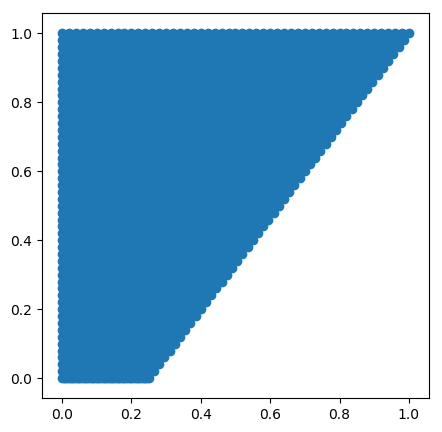

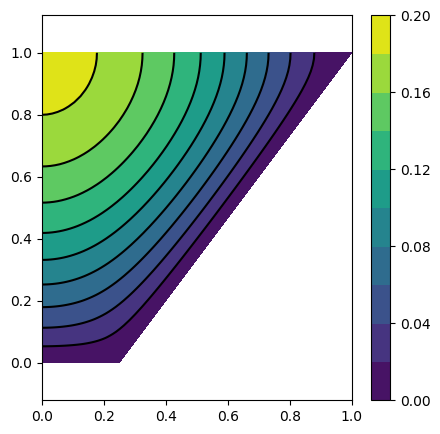

┌ Warning: The default `strides(a::AbstractArray)` implementation is deprecated for general arrays.
│ Specialize `strides(::LinearAlgebra.Adjoint)` if `LinearAlgebra.Adjoint` indeed uses a strided representation in memory.
│ Warning: inappropriately implementing this method for an array type that does not use strided
│ storage may lead to incorrect results or segfaults.
│   caller = ip:0x0
└ @ Core :-1


(0.11278399301014919, [0.0 0.005 … 0.245 0.25; 0.0 0.0053 … 0.2597 0.265; … ; 0.0 0.0197 … 0.9653 0.985; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], [0.0 0.0 … 0.0 0.0; 0.0078302 0.00782889 … 0.000850777 0.0; … ; 0.188691 0.188583 … 0.00238574 0.0; 0.188779 0.188668 … 0.0012047 0.0])

In [6]:
channelflow(3.0, 0.5, 1.0, 50)

The test value of $\hat{\Omega}$ given by Professor Persson is $2\times0.0573688\dots=0.1147376\dots$, which is slightly different (by the third digit). I attribute this to how we might have treated the boundary conditions differently with regards to the finite difference schemes that we each used, but of course, under a larger value of $n$, I am positive that the differences in our methods would be negligible. Regardless, the plots of the grid and the solution which I came up with look identical to the sample solution found in figure 3 of the problem set (I even set the contours to be the same to demonstrate this), so I would think that my methods are still valid. 

**Part (d)**

As in problem 1(b), suppose that the absolute error between our numerical flowrate, $\hat{Q}$, and the exact flowrate, $Q$, is equal to $\vert\vert Q-\hat{Q}\vert\vert=Ch^{p}$, where $C$ is some arbitrary constant, $h$ is the uniform grid stepsize, and $p$ is the order of convergence. Then, the slope of the resulting line from a log-log plot of the absolute error in the flowrate vs. the stepsize will give us $p$, and for this problem, we want to show that $p=2$ (i.e. the convergence is second-order). To test this out, we calculate the absolute error for $n=10,20,40,80$, then find a best-fit slope of the log-log graph using the slope formula from linear least-squares. We also complete this process three times, each for different values of $B=0.0,0.5,1.0$. Finally, we use the numerical solution at $n=80$ to approximate the exact solution.

However, before we start, we define a function which will *only* return the value of $\hat{Q}$. We will also define a function which will return the convergence plot, as well as the estimated value of the slope, given some input value of $B$.

In [6]:
using SparseArrays
using PyPlot

function returnQ(L, B, H, n)
    #setting parameters
    A = sqrt((0.25 * (L - B) ^ 2) - H ^ 2)
    D = (L - B) / 2
    
    h = 1.0 / n
    N = (n + 1) ^ 2
    ξq = h * (0 : n)
    ηq = ξq

    umap = reshape(1 : N, n + 1, n + 1)
    M = Tuple{Int64, Int64, Float64}[] 
    v = zeros(N)
    #Mu = v
    
    for j = 1 : n + 1
        for i = 1 : n + 1
            row = umap[i, j]
            ξ = ξq[i]
            η = ηq[j]
            a = aij(ξ, A, H)
            b = bij(ξ, η, A, B)
            c = cij(η, A, B)
            e = eij(ξ, A)
            if i == 1 && j > 1 && j < n + 1
                #Neumann condition on left boundary
                push!(M, (row, row, -3))
                push!(M, (row, umap[2, j], 4))
                push!(M, (row, umap[3, j], -1))
                v[row] = 0 
            elseif i == n + 1 && j > 1 && j < n + 1 
                #u = 0 on right boundary
                push!(M, (row, row, 1))
                v[row] = 0
            elseif j == 1 && i > 1 && i < n + 1
                #u = 0 on lower boundary
                push!(M, (row, row, 1))
                v[row] = 0
            elseif j == n + 1 && i > 1 && i < n + 1
                #Neumann condition on upper boundary
                push!(M, (row, row, 3))
                push!(M, (row, umap[i, j - 1], -4))
                push!(M, (row, umap[i, j - 2], 1))
                push!(M, (row, umap[i + 1, j], -2 * A * ξ / (2A + B)))
                push!(M, (row, umap[i - 1, j], 2 * A * ξ / (2A + B)))
                v[row] = 0
            elseif i == 1 && j == 1
                #Take u(0,0)=0
                push!(M, (row, row, 1))
                v[row] = 0
            elseif i == n + 1 && j == 1
                #Take u(1,0)=0
                push!(M, (row, row, 1))
                v[row] = 0
            elseif i == 1 && j == n + 1
                #Use left Neumann boundary condition on u(0,1)
                push!(M, (row, row, -3))
                push!(M, (row, umap[2, j], 4))
                push!(M, (row, umap[3, j], -1))
                v[row] = 0
            elseif i == n + 1 && j == n + 1
                #Take u(1,1)=0
                push!(M, (row, row, 1))
                v[row] = 0
            else
                #interior nodes; 9-point stencil
                push!(M, (row, row, 2 * (a + c)))
                push!(M, (row, umap[i - 1, j - 1], b / 2))
                push!(M, (row, umap[i - 1, j], (h * e / 2) - a))
                push!(M, (row, umap[i - 1, j + 1], -b / 2))
                push!(M, (row, umap[i, j - 1], -c))
                push!(M, (row, umap[i, j + 1], -c))
                push!(M, (row, umap[i + 1, j - 1], -b / 2))
                push!(M, (row, umap[i + 1, j], -a - (h * e / 2)))
                push!(M, (row, umap[i + 1, j + 1], b / 2))
                v[row] = (h * Jij(η, A, B, H)) ^ 2
            end
        end
    end
    
    M = sparse((x->x[1]).(M), (x->x[2]).(M), (x->x[3]).(M), N, N)
    
    #solution for u
    u = reshape(M \ v, n + 1, n + 1)
    u = u'
    #using Trapezoidal rule (weighted by the Jacobian, or J_{i,j}, of course)
    Q = (h ^ 2 / 2) * (Jij(ηq[1], A, B, H) * u[1, 1] + Jij(ηq[1], A, B, H) * u[n + 1, 1] + Jij(ηq[n + 1], A, B, H) * u[1, n + 1] + Jij(ηq[n + 1], A, B, H) * u[n + 1, n + 1] + 2 * Jij(ηq[1], A, B, H) * sum(u[2 : n, 1]) + 2 * Jij(ηq[n + 1], A, B, H) * sum(u[2 : n, n + 1]) + 2 * sum(Jij(ηq[2 : n], A, B, H) .* u[1, 2 : n]) + 2 * sum(Jij(ηq[2 : n], A, B, H) .* u[n + 1, 2 : n]) + 4 * sum(Jij(ηq[2 : n], A, B, H) .* u[2 : n, 2 : n]))
    return Q
end

function convergenceplot(B)
    Nq = [10, 20, 50, 80]
    errors = zeros(size(Nq[1 : end - 1]))
    Qexact = returnQ(3.0, B, 1.0, 80)
    n = length(Nq) - 1
    for i = 1 : n
        N = Nq[i]
        Q = returnQ(3.0, B, 1.0, N)
        errors[i] = abs(Qexact - Q)
    end

    hq = 1.0 ./ Nq[1 : end - 1]
    figure(3, figsize = (4, 4))
    loglog(hq, errors, "r-d", label = L"for\quad\hat{Q}")
    xlabel(L"h")
    ylabel(L"\vert\vert Q-\hat{Q}\vert\vert_{2}")
    legend()

    logerrors = log.(errors)
    logh = log.(hq)
    slope = (n * sum(logerrors .* logh) - sum(logerrors) * sum(logh)) / (n * sum(logh .^ 2) - sum(logh) ^ 2)
    println("p = ", slope)
end

convergenceplot (generic function with 1 method)

***B = 0.0***

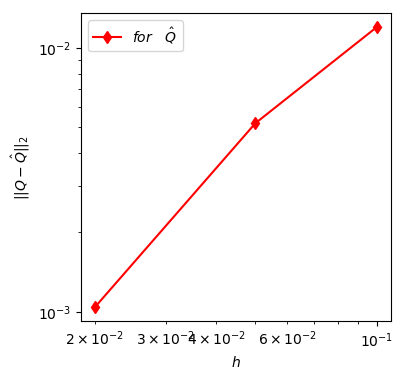

p = 1.5309278846781305


In [10]:
convergenceplot(0.0)

***B = 0.5***

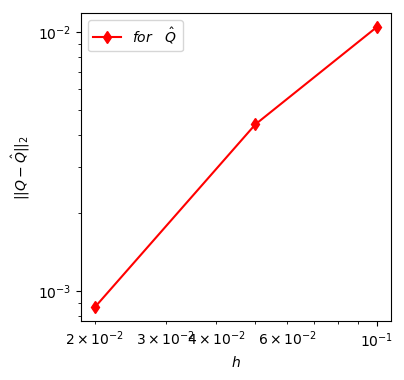

p = 1.5570995302024524


In [8]:
convergenceplot(0.5)

***B = 1.0***

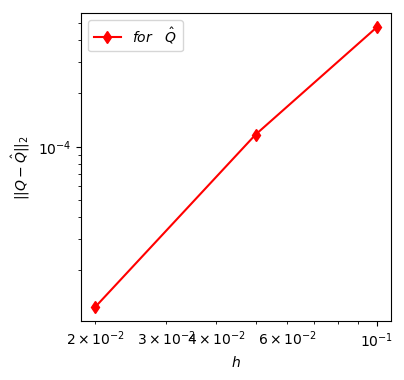

p = 2.2745883950227572


In [9]:
convergenceplot(1.0)

As we can see, the convergence plots are not very linear, and even if we impose linearity, the values of $p$ are not very close to 2, being either below or above depending on the value of $B$. There is probably some small mistake I missed (in the code, I am thinking), and I apologize for whatever it is. I spent several hours trying to find it, to no avail! (I talked to Professor Olsson for help, and he said that, regardless, my plot still looks exact, so it must have been something very minor, but apparently major enough to affect the convergence rate. Anyways, my simulation would work just fine for practical purposes, but this is still an interesting theoretical effect.) $\boxed{}$

## Problem 3
**Part (a)**

We are looking at the diffusion PDE

$$u_{t}=\kappa u_{xx}-\gamma u \quad(1)$$

as approximated by the following finite-difference scheme:

$$U^{n+1}_{j}=U^{n}_{j}+\frac{k\kappa}{2h^{2}}\left[U^{n}_{j-1}-2U^{n}_{j}+U^{n}_{j+1}+U^{n+1}_{j-1}-2U^{n+1}_{j}+U^{n+1}_{j+1}\right]-k\gamma\left[(1-\theta)U^{n}_{j}+\theta U^{n+1}_{j}\right]\quad(2)$$

In a similar vein to problem 1, we want to take multivariable Taylor expansions to write everything in terms of $U^{n}_{j}=U$ and its derivatives. First off, we rearrange $(2)$ into the form

$$\frac{U^{n+1}_{j}-U^{n}_{j}}{k}=\frac{\kappa}{2h^{2}}\left(U^{n}_{j-1}-2U^{n}_{j}+U^{n}_{j+1}\right)+\frac{\kappa}{2h^{2}}\left(U^{n+1}_{j-1}-2U^{n+1}_{j}+U^{n+1}_{j+1}\right)-\gamma\left[(1-\theta)U^{n}_{j}+\theta U^{n+1}_{j}\right]\quad(3)$$

Note that $k:=t_{i+1}-t_{i}\hspace{0.1cm}\forall i$ and $h:=x_{i+1}-x_{i}\hspace{0.1cm}\forall i$. Note that the left side of $(3)$ is just the first-order forward difference operator, which can be related (as shown in LeVeque and in https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf) to $U$ via Taylor series expansion, which gives us 

$$U_{t}-\frac{U^{n+1}_{j}-U}{k}=-\frac{k}{2}U_{tt}+\frac{k^{2}}{6}U_{ttt}+O\left(k^{3}\right)\quad(4)$$

Furthermore, these sources also relate some of the terms on the right to second derivatives of $u$:

$$U_{xx}-\frac{U^{n}_{j-1}-2U+U^{n}_{j+1}}{h^{2}}=-\frac{h^{2}}{12}U_{xxxx}+O(h^{3}) \\
\frac{\partial^{2} U^{n+1}_{j}}{\partial x^{2}}-\frac{U^{n+1}_{j-1}-2U^{n+1}_{j}+U^{n+1}_{j+1}}{h^{2}}=-\frac{h^{2}}{12}\frac{\partial^{4} U^{n+1}_{j}}{\partial x^{4}}+O(h^{3}) \quad(5)
$$

Therefore, plugging in $(4)$ and $(5)$ into $(3)$, we have that

$$
U_{t}+\frac{k}{2}U_{tt}-\frac{k^{2}}{6}U_{ttt}+O\left(k^{3}\right)=\frac{\kappa}{2}\left(U_{xx}+\frac{h^{2}}{12}U_{xxxx}\right)+\frac{\kappa}{2}\left(\frac{\partial^{2} U^{n+1}_{j}}{\partial x^{2}}+\frac{h^{2}}{12}\frac{\partial^{4} U^{n+1}_{j}}{\partial x^{4}}\right)-\gamma\left[(1-\theta)U+\theta U^{n+1}_{j}\right]+O\left(h^{3}\right)\quad(6)
$$

Thus, we have now reduced all of the terms, such that they are written about the same position, $x=x_{j}$. Now, we need to take a Taylor expansion of $U^{n+1}_{j}$ in *time* only to write everything about the same moment in time, $t=t_{n}$.

$$
U^{n+1}_{j}=U+kU_{t}+\frac{k^{2}}{2!}U_{tt}+\frac{k^{3}}{3!}U_{ttt}+O\left(k^{4}\right)=U+kU_{t}+\frac{k^{2}}{2}U_{tt}+O\left(k^{3}\right) \\ \Rightarrow \frac{\partial^{2} U^{n+1}_{j}}{\partial x^{2}}=U_{xx}+kU_{xxt}+\frac{k^{2}}{2}U_{xxtt}+O\left(k^{3}\right) \\ \Rightarrow \frac{\partial^{4} U^{n+1}_{j}}{\partial x^{4}}=U_{xxxx}+kU_{xxxxt}+\frac{k^{2}}{2}U_{xxxxtt}+O\left(k^{3}\right)\quad(7)
$$

Finally, we plug $(7)$ into $(6)$.

$$
U_{t}+\frac{k}{2}U_{tt}-\frac{k^{2}}{6}U_{ttt}+O\left(k^{3}\right)=\frac{\kappa}{2}\left(U_{xx}+\frac{h^{2}}{12}U_{xxxx}\right)+\frac{\kappa}{2}\left(U_{xx}+kU_{xxt}+\frac{k^{2}}{2}U_{xxtt}+O\left(k^{3}\right)+\\\frac{h^{2}}{12}\left(U_{xxxx}+kU_{xxxxt}+\frac{k^{2}}{2}U_{xxxxtt}+O\left(k^{3}\right)\right)\right)-\gamma\left[(1-\theta)U+\theta \left(U+kU_{t}+\frac{k^{2}}{2}U_{tt}+O\left(k^{3}\right)\right)\right]+O\left(h^{3}\right) \\ \Rightarrow U_{t}+\frac{k}{2}U_{tt}-\frac{k^{2}}{6}U_{tt}=\frac{\kappa}{2}\left(U_{xx}+\frac{h^{2}}{12}U_{xxxx}\right)+\frac{\kappa}{2}\left(U_{xx}+\frac{h^{2}}{12}U_{xxxx}\right)+\frac{\kappa}{2}\left(kU_{xxt}+\frac{k^{2}}{2}U_{xxtt}+O\left(k^{3}\right)+\\ \frac{h^{2}}{12}\left(kU_{xxxxt}+\frac{k^{2}}{2}U_{xxxxtt}+O\left(k^{3}\right)\right)\right)-\gamma\left[U+\theta\left(kU_{t}+\frac{k^{2}}{2}U_{tt}\right)\right]+O\left(k^{3}\right)+O\left(h^{3}\right)\quad(8)
$$

Let's now group the terms in $(8)$ based off of orders in $k$ and $h$, which will help to see what we can cancel and simplify.

$$
U_{t}+\frac{k}{2}U_{tt}-\frac{k^{2}}{6}U_{ttt}=\frac{\kappa}{2}U_{xx}+\frac{\kappa}{2}U_{xx}-\gamma U+k\left(\frac{\kappa U_{xxt}}{2}-\theta\gamma U_{t}\right)+k^{2}\left(\frac{\kappa}{4}U_{xxtt}-\frac{\theta\gamma}{2}U_{tt}\right)+h^{2}\left(\frac{\kappa}{24}U_{xxxx}+\frac{\kappa}{24}U_{xxxx}\right)+h^{2}k\frac{\kappa U_{xxxxt}}{24}+h^{2}k^{2}\frac{\kappa U_{xxxxtt}}{48}+O\left(k^{3}\right)+O\left(h^{3}\right) \\ \Rightarrow U_{t}-\kappa U_{xx}+\gamma U=\frac{k}{2}\left(\kappa U_{xxt}-2\theta\gamma U_{t}-U_{tt}\right)+\frac{k^{2}}{2}\left(\frac{\kappa}{2}U_{xxtt}+\left(\frac{1}{3}-\theta\gamma\right) U_{tt}\right)+\frac{h^{2}\kappa}{12}U_{xxxx}+O\left(h^{2}k\right)+O\left(k^{3}\right)+O\left(h^{3}\right) \quad(9)
$$

By $(1)$, if $U$ were the exact solution, then the left side of $(9)$ would be zero. However, there is a truncation error on the right side. What is nice about this scheme is that *we* have control over $\theta$ though, so by adjusting $\theta$ appropriately, we might be able to make the $O(k)$ term vanish. 

First off, by taking the time derivative of both sides of $(1)$, we get that 
$$\kappa U_{xxt}-U_{tt}-\gamma U_{t}=0\quad(10)$$

Therefore, since the $O(k)$ term of $(9)$ is equal to $\kappa U_{xxt}-2\theta\gamma U_{t}-U_{tt}$, the term will vanish if $\theta=\frac{1}{2}$. In that case, $$U_{t}-\kappa U_{xx}+\gamma U=\frac{k^{2}}{2}\left(\frac{\kappa}{2}U_{xxtt}+\left(\frac{1}{3}-\frac{\gamma}{2}\right) U_{tt}\right)+O\left(h^{2}\right)+O\left(k^{3}\right) \\ \Rightarrow \boxed{U_{t}-\kappa U_{xx}+\gamma U=O\left(k^{2}\right)+O\left(h^{2}\right)}$$

However, if $\theta\neq\frac{1}{2}$, then the $O(k)$ term will not necessarily vanish, so in that case, 

$$
U_{t}-\kappa U_{xx}+\gamma U=\frac{k}{2}\left(\kappa U_{xxt}-\gamma U_{t}-U_{tt}+\left(1-2\theta\right)\gamma U_{t}\right)+\frac{k^{2}}{2}\left(\frac{\kappa}{2}U_{xxtt}+\left(\frac{1}{3}-\theta\gamma\right) U_{tt}\right)+O\left(h^{2}\right)+O\left(k^{3}\right)=k\frac{\left(1-2\theta\right)\gamma U_{t}}{2}+O\left(k^{2}\right)+O\left(h^{2}\right) \\ \Rightarrow \boxed{U_{t}-\kappa U_{xx}+\gamma U=O\left(k\right)+O\left(h^{2}\right)}
$$

as desired. $\boxed{}$